In [1]:
import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir)

In [2]:
import itertools
import pandas as pd
import numpy as np
from bayesian.train_bn import structure_learning, parameter_learning
from preprocess.discretization import get_nodes_type, discretization, code_categories
from visualization.visualization import draw_BN, draw_comparative_hist, get_probability
from sklearn.linear_model import LogisticRegression
from bayesian.save_bn import save_structure, save_params, read_structure, read_params
from external.libpgm.hybayesiannetwork import HyBayesianNetwork

In [3]:
method = 'MI'

In [4]:
geo = pd.read_csv('../data/hackathon_processed.csv')
columns = ['Tectonic regime', 'Period', 'Lithology', 'Structural setting', 'Hydrocarbon type', 'Gross','Netpay','Porosity','Permeability', 'Depth']
geo = geo[columns]
geo.dropna(inplace=True)
geo.reset_index(inplace=True, drop=True)

In [5]:
geo_types = get_nodes_type(geo)
geo_types

{'Tectonic regime': 'disc',
 'Period': 'disc',
 'Lithology': 'disc',
 'Structural setting': 'disc',
 'Hydrocarbon type': 'disc',
 'Gross': 'cont',
 'Netpay': 'cont',
 'Porosity': 'cont',
 'Permeability': 'cont',
 'Depth': 'cont'}

In [6]:
colums_for_code = []
columns_for_disc = []
for c in columns:
    if geo_types[c] == 'disc':
        colums_for_code.append(c)
    else:
        columns_for_disc.append(c)

In [7]:
geo_coded, label_coder = code_categories(geo, 'label', colums_for_code)
geo_discrete, coder = discretization(geo_coded, 'equal_frequency', columns_for_disc)
geo_only_discrete, discrete_coder = discretization(geo, 'equal_frequency', columns_for_disc)

In [8]:
geo_new_types = {'Tectonic regime': 'disc',
 'Period': 'disc',
 'Lithology': 'disc',
 'Structural setting': 'disc',
 'Hydrocarbon type': 'disc',
 'Gross': 'disc',
 'Netpay': 'disc',
 'Porosity': 'disc',
 'Permeability': 'disc',
 'Depth': 'disc'}

# Nodes for the child node evaluation experiment

In [9]:
columns = ['Tectonic regime','Gross', 'Hydrocarbon type', 'Period']
node = 'Hydrocarbon type'

# Logit simple

In [10]:
bn_geo = {'V': columns, 'E': [['Tectonic regime', 'Period'], ['Tectonic regime', 'Gross'], ['Period', 'Gross'], 
['Gross', 'Hydrocarbon type']]}
test = geo[columns]
test_types = get_nodes_type(test)
params = parameter_learning(test, test_types, bn_geo, 'simple')

In [11]:
print(params)

ean_scal': []}, "['EXTENSION', 'ORDOVICIAN']": {'variance': 0.0, 'mean_base': 168.0, 'mean_scal': []}, "['EXTENSION', 'PALEOGENE']": {'variance': 332645.19433593744, 'mean_base': 398.90625, 'mean_scal': []}, "['EXTENSION', 'PALEOGENE-NEOGENE']": {'variance': nan, 'mean_base': nan, 'mean_scal': []}, "['EXTENSION', 'PALEOZOIC']": {'variance': 0.0, 'mean_base': 390.0, 'mean_scal': []}, "['EXTENSION', 'PALEOZOIC-CRETACEOUS']": {'variance': 0.0, 'mean_base': 690.0, 'mean_scal': []}, "['EXTENSION', 'PERMIAN']": {'variance': 20306.25, 'mean_base': 151.5, 'mean_scal': []}, "['EXTENSION', 'PERMIAN-TRIASSIC']": {'variance': nan, 'mean_base': nan, 'mean_scal': []}, "['EXTENSION', 'PROTEROZOIC']": {'variance': 6201.5625, 'mean_base': 313.05, 'mean_scal': []}, "['EXTENSION', 'PROTEROZOIC-CAMBRIAN']": {'variance': nan, 'mean_base': nan, 'mean_scal': []}, "['EXTENSION', 'SILURIAN']": {'variance': nan, 'mean_base': nan, 'mean_scal': []}, "['EXTENSION', 'TRIASSIC']": {'variance': 0.0, 'mean_base': 65.1

In [12]:
save_structure(bn_geo, 'geo_net')
skel = read_structure('geo_net')
save_params(params, 'geo_net_param')
params = read_params('geo_net_param')
geo_bn = HyBayesianNetwork(skel, params)

In [13]:
est = pd.DataFrame(geo_bn.randomsample(50, 'simple'))

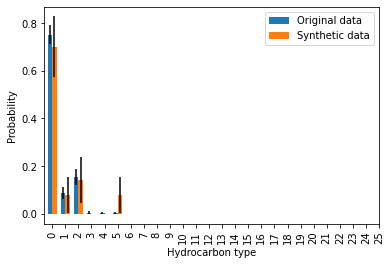

In [14]:
draw_comparative_hist(node, geo[[node]], est, geo_types)

# Logitandd simple

In [15]:
bn_geo = {'V': columns, 'E': [['Tectonic regime', 'Period'], ['Tectonic regime', 'Gross'], ['Period', 'Gross'], 
['Tectonic regime', 'Hydrocarbon type'], ['Period', 'Hydrocarbon type'],['Gross', 'Hydrocarbon type']]}
test = geo[columns]
test_types = get_nodes_type(test)
params = parameter_learning(test, test_types, bn_geo, 'simple')

In [16]:
print(params)

CEOUS']": {'classes': [], 'mean_base': [nan], 'mean_scal': [nan]}, "['GRAVITY', 'CARBONIFEROUS-PERMIAN']": {'classes': ['OIL'], 'mean_base': [0.0], 'mean_scal': [1.7976931348623157e+308]}, "['GRAVITY', 'CRETACEOUS']": {'classes': ['GAS', 'GAS-CONDENSATE', 'OIL'], 'mean_base': [-0.9770325018317925, 0.17016956122219473, 0.8068629406095936], 'mean_scal': [0.0029254159462748243, -0.016973991278577502, 0.014048575332544201]}, "['GRAVITY', 'CRETACEOUS-PALEOGENE']": {'classes': ['GAS-CONDENSATE', 'OIL'], 'mean_base': [-26.76198957374106], 'mean_scal': [0.12390095289381342]}, "['GRAVITY', 'DEVONIAN']": {'classes': [], 'mean_base': [nan], 'mean_scal': [nan]}, "['GRAVITY', 'DEVONIAN-CARBONIFEROUS']": {'classes': [], 'mean_base': [nan], 'mean_scal': [nan]}, "['GRAVITY', 'DEVONIAN-PERMIAN']": {'classes': [], 'mean_base': [nan], 'mean_scal': [nan]}, "['GRAVITY', 'JURASSIC']": {'classes': ['GAS', 'GAS-CONDENSATE', 'OIL'], 'mean_base': [-1.0321340843273041, -0.9640737821367976, 1.996207866464101], 'm

In [17]:
save_structure(bn_geo, 'geo_net')
skel = read_structure('geo_net')
save_params(params, 'geo_net_param')
params = read_params('geo_net_param')
geo_bn = HyBayesianNetwork(skel, params)

In [18]:
est = pd.DataFrame(geo_bn.randomsample(50, 'simple'))

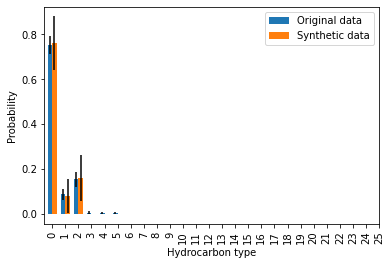

In [19]:
draw_comparative_hist(node, geo[[node]], est, geo_types)

# Logit mix

In [20]:
bn_geo = {'V': columns, 'E': [['Tectonic regime', 'Period'], ['Tectonic regime', 'Gross'], ['Period', 'Gross'], 
['Gross', 'Hydrocarbon type']]}
test = geo[columns]
test_types = get_nodes_type(test)
params = parameter_learning(test, test_types, bn_geo, 'mix')

C:\Users\NYashch\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\mixture\_base.py:147: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  label = cluster.KMeans(n_clusters=self.n_components, n_init=1,
C:\Users\NYashch\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\mixture\_base.py:147: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  label = cluster.KMeans(n_clusters=self.n_components, n_init=1,


In [21]:
print(params)

0, 'mean_base': 216.0, 'mean_scal': []}, "['GRAVITY', 'DEVONIAN']": {'variance': nan, 'mean_base': nan, 'mean_scal': []}, "['GRAVITY', 'DEVONIAN-CARBONIFEROUS']": {'variance': nan, 'mean_base': nan, 'mean_scal': []}, "['GRAVITY', 'DEVONIAN-PERMIAN']": {'variance': nan, 'mean_base': nan, 'mean_scal': []}, "['GRAVITY', 'JURASSIC']": {'variance': [[[1.0469004627624234e-24]], [[1840.2200398155517]], [[0.5624994743434611]]], 'mean_base': [[449.999999999999], [95.32305196581245], [23.24927497824978]], 'mean_scal': [0.08333333333333347, 0.7553116664423601, 0.1613550002243064]}, "['GRAVITY', 'JURASSIC-CRETACEOUS']": {'variance': 0.0, 'mean_base': 1574.7, 'mean_scal': []}, "['GRAVITY', 'MESOZOIC']": {'variance': nan, 'mean_base': nan, 'mean_scal': []}, "['GRAVITY', 'NEOGENE']": {'variance': [[[43409.72250001533]], [[1.0469004627624234e-24]], [[268.117401207477]], [[753.6983920331792]]], 'mean_base': [[1813.3499999999885], [449.999999999999], [43.261177937555], [136.5444109741754]], 'mean_scal':

In [22]:
save_structure(bn_geo, 'geo_net')
skel = read_structure('geo_net')
save_params(params, 'geo_net_param')
params = read_params('geo_net_param')
geo_bn = HyBayesianNetwork(skel, params)

In [23]:
est = pd.DataFrame(geo_bn.randomsample(50, 'mix'))

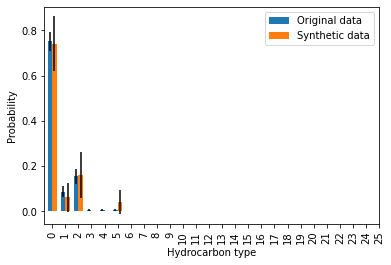

In [24]:
draw_comparative_hist(node, geo[[node]], est, geo_types)

# Logitandd mix

In [25]:
bn_geo = {'V': columns, 'E': [['Tectonic regime', 'Period'], ['Tectonic regime', 'Gross'], ['Period', 'Gross'], 
['Tectonic regime', 'Hydrocarbon type'], ['Period', 'Hydrocarbon type'],['Gross', 'Hydrocarbon type']]}
test = geo[columns]
test_types = get_nodes_type(test)
params = parameter_learning(test, test_types, bn_geo, 'mix')

C:\Users\NYashch\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\mixture\_base.py:147: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  label = cluster.KMeans(n_clusters=self.n_components, n_init=1,
C:\Users\NYashch\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\mixture\_base.py:147: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  label = cluster.KMeans(n_clusters=self.n_components, n_init=1,


In [26]:
print(params)

CEOUS']": {'classes': [], 'mean_base': [nan], 'mean_scal': [nan]}, "['GRAVITY', 'CARBONIFEROUS-PERMIAN']": {'classes': ['OIL'], 'mean_base': [0.0], 'mean_scal': [1.7976931348623157e+308]}, "['GRAVITY', 'CRETACEOUS']": {'classes': ['GAS', 'GAS-CONDENSATE', 'OIL'], 'mean_base': [-0.9770325018317925, 0.17016956122219473, 0.8068629406095936], 'mean_scal': [0.0029254159462748243, -0.016973991278577502, 0.014048575332544201]}, "['GRAVITY', 'CRETACEOUS-PALEOGENE']": {'classes': ['GAS-CONDENSATE', 'OIL'], 'mean_base': [-26.76198957374106], 'mean_scal': [0.12390095289381342]}, "['GRAVITY', 'DEVONIAN']": {'classes': [], 'mean_base': [nan], 'mean_scal': [nan]}, "['GRAVITY', 'DEVONIAN-CARBONIFEROUS']": {'classes': [], 'mean_base': [nan], 'mean_scal': [nan]}, "['GRAVITY', 'DEVONIAN-PERMIAN']": {'classes': [], 'mean_base': [nan], 'mean_scal': [nan]}, "['GRAVITY', 'JURASSIC']": {'classes': ['GAS', 'GAS-CONDENSATE', 'OIL'], 'mean_base': [-1.0321340843273041, -0.9640737821367976, 1.996207866464101], 'm

In [27]:
save_structure(bn_geo, 'geo_net')
skel = read_structure('geo_net')
save_params(params, 'geo_net_param')
params = read_params('geo_net_param')
geo_bn = HyBayesianNetwork(skel, params)

In [28]:
est = pd.DataFrame(geo_bn.randomsample(50, 'mix'))

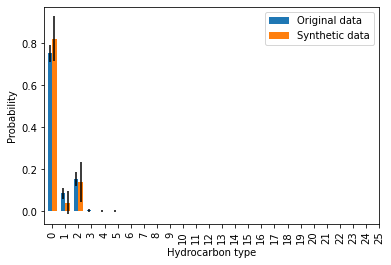

In [29]:
draw_comparative_hist(node, geo[[node]], est, geo_types)

# Discrete simple

In [30]:
bn_geo = {'V': columns, 'E': [['Tectonic regime', 'Period'], ['Tectonic regime', 'Gross'], ['Period', 'Gross'], 
['Tectonic regime', 'Hydrocarbon type'], ['Period', 'Hydrocarbon type']]}
test = geo[columns]
test_types = get_nodes_type(test)
params = parameter_learning(test, test_types, bn_geo, 'simple')

In [31]:
print(params)

0.16666666666666669], "['STRIKE-SLIP', 'CARBONIFEROUS-PERMIAN']": [0.16666666666666669, 0.16666666666666669, 0.16666666666666669, 0.16666666666666669, 0.16666666666666669, 0.16666666666666669], "['STRIKE-SLIP', 'CRETACEOUS']": [0.16666666666666669, 0.16666666666666669, 0.16666666666666669, 0.16666666666666669, 0.16666666666666669, 0.16666666666666669], "['STRIKE-SLIP', 'CRETACEOUS-PALEOGENE']": [0.16666666666666669, 0.16666666666666669, 0.16666666666666669, 0.16666666666666669, 0.16666666666666669, 0.16666666666666669], "['STRIKE-SLIP', 'DEVONIAN']": [0.0, 0.0, 0.5, 0.0, 0.0, 0.5], "['STRIKE-SLIP', 'DEVONIAN-CARBONIFEROUS']": [0.16666666666666669, 0.16666666666666669, 0.16666666666666669, 0.16666666666666669, 0.16666666666666669, 0.16666666666666669], "['STRIKE-SLIP', 'DEVONIAN-PERMIAN']": [0.16666666666666669, 0.16666666666666669, 0.16666666666666669, 0.16666666666666669, 0.16666666666666669, 0.16666666666666669], "['STRIKE-SLIP', 'JURASSIC']": [0.16666666666666669, 0.1666666666666666

In [32]:
save_structure(bn_geo, 'geo_net')
skel = read_structure('geo_net')
save_params(params, 'geo_net_param')
params = read_params('geo_net_param')
geo_bn = HyBayesianNetwork(skel, params)

In [33]:
est = pd.DataFrame(geo_bn.randomsample(50, 'simple'))

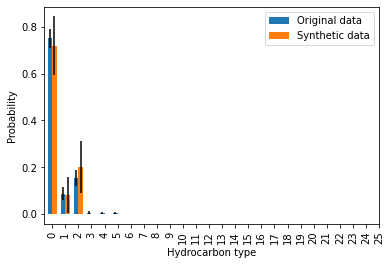

In [34]:
draw_comparative_hist(node, geo[[node]], est, geo_types)

# Discrete mix

In [35]:
bn_geo = {'V': columns, 'E': [['Tectonic regime', 'Period'], ['Tectonic regime', 'Gross'], ['Period', 'Gross'], 
['Tectonic regime', 'Hydrocarbon type'], ['Period', 'Hydrocarbon type']]}
test = geo[columns]
test_types = get_nodes_type(test)
params = parameter_learning(test, test_types, bn_geo, 'mix')

C:\Users\NYashch\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\mixture\_base.py:147: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  label = cluster.KMeans(n_clusters=self.n_components, n_init=1,
C:\Users\NYashch\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\mixture\_base.py:147: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  label = cluster.KMeans(n_clusters=self.n_components, n_init=1,


In [36]:
print(params)

0.16666666666666669], "['STRIKE-SLIP', 'CARBONIFEROUS-PERMIAN']": [0.16666666666666669, 0.16666666666666669, 0.16666666666666669, 0.16666666666666669, 0.16666666666666669, 0.16666666666666669], "['STRIKE-SLIP', 'CRETACEOUS']": [0.16666666666666669, 0.16666666666666669, 0.16666666666666669, 0.16666666666666669, 0.16666666666666669, 0.16666666666666669], "['STRIKE-SLIP', 'CRETACEOUS-PALEOGENE']": [0.16666666666666669, 0.16666666666666669, 0.16666666666666669, 0.16666666666666669, 0.16666666666666669, 0.16666666666666669], "['STRIKE-SLIP', 'DEVONIAN']": [0.0, 0.0, 0.5, 0.0, 0.0, 0.5], "['STRIKE-SLIP', 'DEVONIAN-CARBONIFEROUS']": [0.16666666666666669, 0.16666666666666669, 0.16666666666666669, 0.16666666666666669, 0.16666666666666669, 0.16666666666666669], "['STRIKE-SLIP', 'DEVONIAN-PERMIAN']": [0.16666666666666669, 0.16666666666666669, 0.16666666666666669, 0.16666666666666669, 0.16666666666666669, 0.16666666666666669], "['STRIKE-SLIP', 'JURASSIC']": [0.16666666666666669, 0.1666666666666666

In [37]:
save_structure(bn_geo, 'geo_net')
skel = read_structure('geo_net')
save_params(params, 'geo_net_param')
params = read_params('geo_net_param')
geo_bn = HyBayesianNetwork(skel, params)

In [38]:
est = pd.DataFrame(geo_bn.randomsample(50, 'mix'))

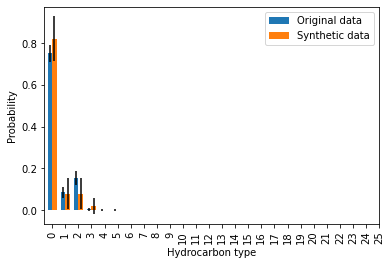

In [39]:
draw_comparative_hist(node, geo[[node]], est, geo_types)